In [1]:
import numpy as np
import matplotlib.pyplot as plt
from spe_one_tel import mes_fitter

In [2]:
fitter= mes_fitter( day          = 29,
                    month        = 11,
                    year         = 2022,
                    data_path    = '/net/',
                    tel          = 2,
                    first_file_n = 150,
                    n_files      = 1,
                    max_evt      = 50000,
                    plot_dir     = "./plots/")

In [3]:
fitter.do_all_fit()

starting...to read data
11972 evts proceeded
11972 evts in histogram


/media/zrdz/Nouveau nom/taf/FZU/python/F2F_notebooks/spe_one_tel.py:214: RuntimeWarning: divide by zero encountered in log
  l =  np.sum( [np.log(preds[ii])*Y[ii]-preds[ii]-scipy.special.gammaln(Y[ii]+1) for ii in range(len(Y)) ] )
/media/zrdz/Nouveau nom/taf/FZU/python/F2F_notebooks/spe_one_tel.py:214: RuntimeWarning: invalid value encountered in double_scalars
  l =  np.sum( [np.log(preds[ii])*Y[ii]-preds[ii]-scipy.special.gammaln(Y[ii]+1) for ii in range(len(Y)) ] )
/media/zrdz/Nouveau nom/taf/FZU/python/F2F_notebooks/spe_one_tel.py:240: HesseFailedWarning: HESSE Failed. Covariance and GlobalCC will not be available
  m.hesse()


What is done in the script :

* Sum last 15 bins of the waveforms after digicam baseline subtraction
* Histogram of $\sim$ 30 000 evts
* fit the ADC distribution with eq :

$$
\Large
p_x(x| g,p,x_0,\sigma^2_{pe},\sigma^2_{el} ) =
\sum^\infty_{n=0}
\frac{((n+1)p)^n * e^{-p(n+1)}}{(n+1)!} . 
\frac{e^{-\frac{1}{2}
\frac{(x-(x_0+n \dot g))^2}{ \sqrt{n*\sigma^2_{pe} + \sigma^2_{el} }}}}
{\sqrt{2\pi (n * \sigma^2_{pe}  + \sigma^2_{el} ) }}  
$$


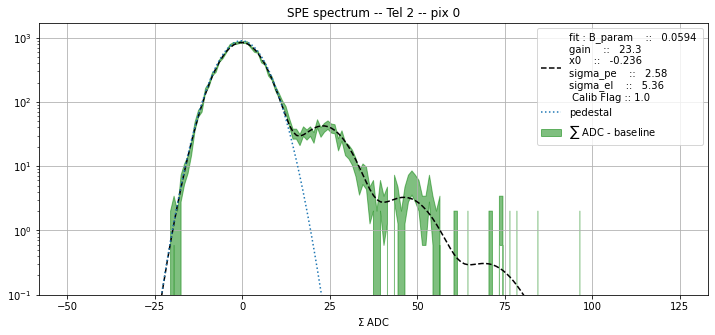

In [13]:
p = fitter.plot_onepix(pix=0)

In [5]:
fitter.res

,B_param,gain,x0,sigma_pe,sigma_el,P_chi2,calib_flag
0,0.059361,23.299956,-0.236279,2.577600,5.359326,0.580658,1
1,0.068268,23.591600,-0.467577,3.651196,4.958743,0.690398,1
2,0.023647,1.371438,1.247250,5.642097,3.863676,0.399661,0
3,0.067538,17.329120,0.414756,9.999948,7.961226,0.892520,1
4,0.050912,25.238113,0.148983,3.919617,7.610087,0.746809,1
...,...,...,...,...,...,...,...
1291,0.059266,11.652100,0.704992,0.004467,4.353376,0.338223,0
1292,0.217663,8.427612,-0.612183,0.008291,7.803634,1.413644,0
1293,0.067509,21.182915,-0.116846,3.449561,5.210526,0.437068,1
1294,0.062932,18.753566,0.174685,3.655217,4.148061,0.450489,1


total 404
-rwxrwxrwx 1 zrdz 58516 déc.   4 17:44 cam_B_param_telt.png*
-rwxrwxrwx 1 zrdz 47836 déc.   4 17:44 cam_calib_flag_telt.png*
-rwxrwxrwx 1 zrdz 58020 déc.   4 17:44 cam_gain_telt.png*
-rwxrwxrwx 1 zrdz 56900 déc.   4 17:44 cam_P_chi2_telt.png*
-rwxrwxrwx 1 zrdz 57927 déc.   4 17:44 cam_sigma_el_telt.png*
-rwxrwxrwx 1 zrdz 58256 déc.   4 17:44 cam_sigma_pe_telt.png*
-rwxrwxrwx 1 zrdz 58550 déc.   4 17:44 cam_x0_telt.png*


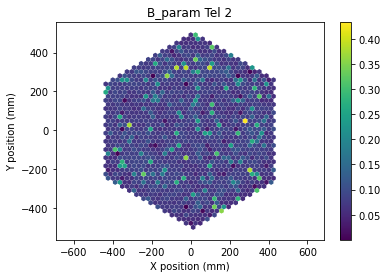

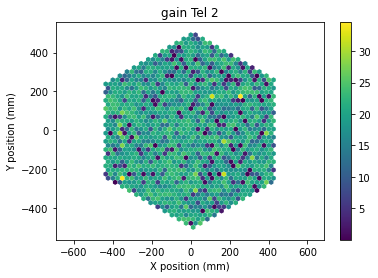

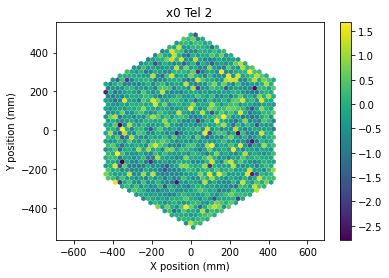

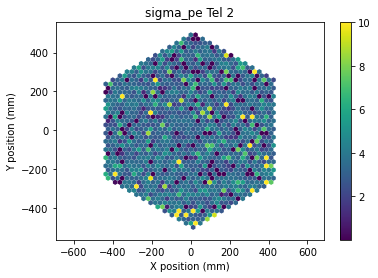

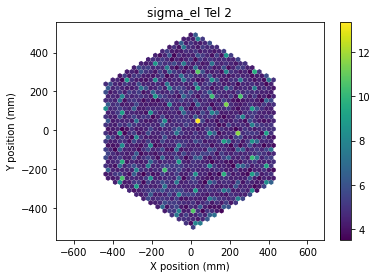

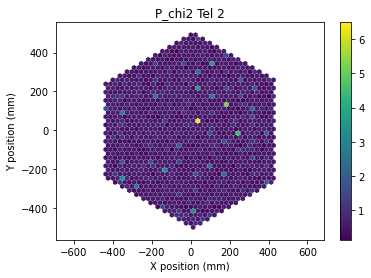

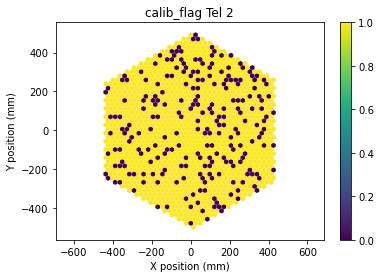

In [15]:
fitter.plot_cam_dist(save_plots=False)

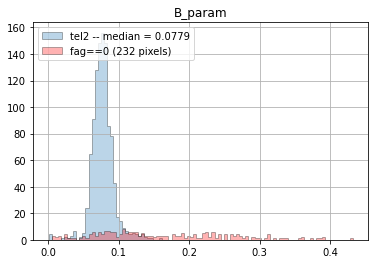

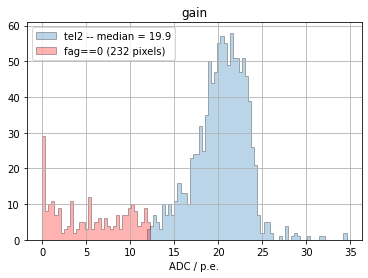

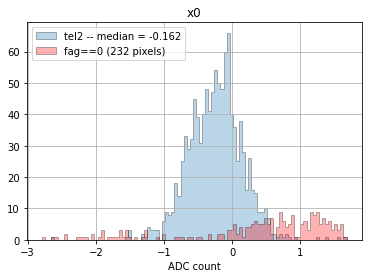

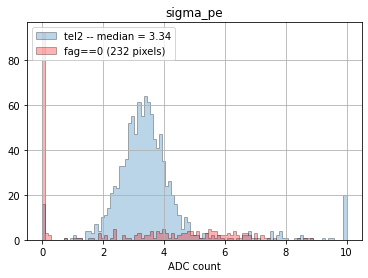

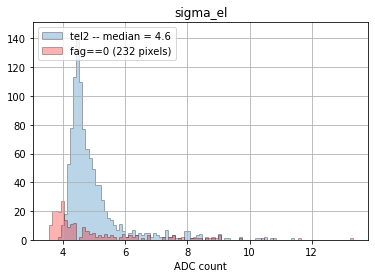

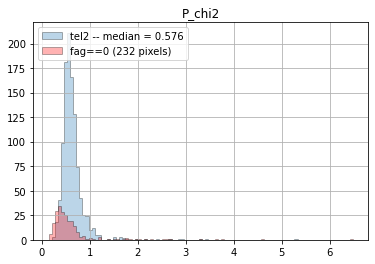

In [8]:
    mask = fitter.res['calib_flag']==1
    
    kwargs = dict(histtype='stepfilled', alpha=0.3, ec="k")
    # kwargs = dict(histtype='step',alpha=.8)
    for key in fitter.res.keys()[:-1]:
        f,ax = plt.subplots()
        bins = np.linspace(fitter.res[key].min(),
                           fitter.res[key].max(),
                               100)

        ax.hist(fitter.res[key][mask],
                bins=bins,
                label = 'tel{} -- median = {:.3}'.format(fitter.tel,np.median(fitter.res[key])),
                **kwargs)
        ax.hist(fitter.res[key][~mask],
                bins=bins,
                label = 'fag==0 ({} pixels)'.format((~mask).sum()),
                color='red',
                **kwargs)
        ax.set_title(key)
        ax.legend(loc='upper left')
        ax.grid()
        if key not in[ 'B_param', 'gain','P_chi2']:
            ax.set_xlabel('ADC count')
        if key =='gain':
            ax.set_xlabel('ADC / p.e.')

(<Figure size 864x360 with 1 Axes>,
 <AxesSubplot:title={'center':'SPE spectrum -- Tel 2 -- pix 0'}, xlabel='$\\Sigma$ ADC'>)

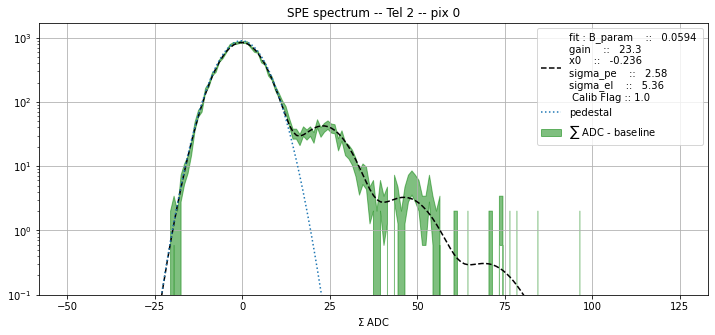

In [9]:
fitter.plot_onepix(0)

(<Figure size 864x360 with 1 Axes>,
 <AxesSubplot:title={'center':'SPE spectrum -- Tel 2 -- pix 2'}, xlabel='$\\Sigma$ ADC'>)

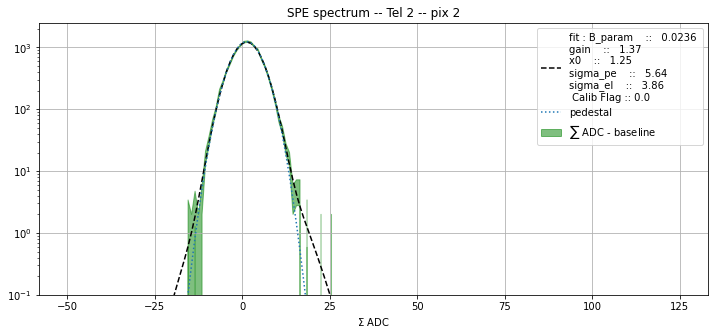

In [10]:
fitter.plot_onepix(fitter.pixels[~mask][0])

(<Figure size 864x360 with 1 Axes>,
 <AxesSubplot:title={'center':'SPE spectrum -- Tel 2 -- pix 11'}, xlabel='$\\Sigma$ ADC'>)

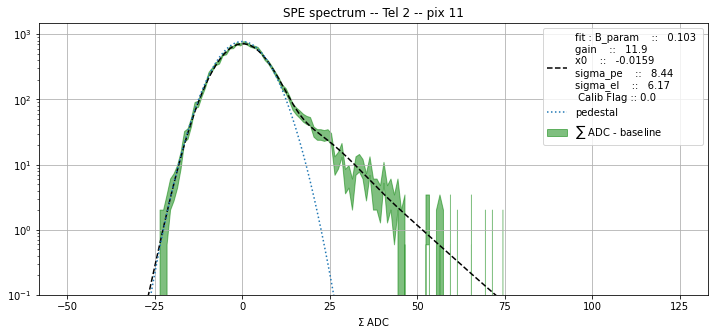

In [11]:
fitter.plot_onepix(fitter.pixels[~mask][1])

In [12]:
fitter.res[~mask]

,B_param,gain,x0,sigma_pe,sigma_el,P_chi2,calib_flag
2,0.023647,1.371438,1.247250,5.642097,3.863676,0.399661,0
11,0.102893,11.932402,-0.015939,8.437898,6.174437,0.558545,0
30,0.008504,0.120291,1.170696,0.002875,3.574279,0.225527,0
34,0.355592,2.009031,0.376882,2.711412,3.664357,0.317228,0
35,0.103994,6.222474,0.864695,6.036604,4.409670,0.281971,0
...,...,...,...,...,...,...,...
1272,0.200401,0.013471,1.330898,3.196401,3.955667,0.544890,0
1279,0.321144,5.304762,-1.107605,0.005191,4.778866,0.321965,0
1291,0.059266,11.652100,0.704992,0.004467,4.353376,0.338223,0
1292,0.217663,8.427612,-0.612183,0.008291,7.803634,1.413644,0
